In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.models import squeezenet1_1, SqueezeNet1_1_Weights
from torch.utils.data import random_split
from funcoes_auxiliares import plot_confusion_matrix

In [2]:
model = squeezenet1_1(weights=SqueezeNet1_1_Weights)
model.eval()

# Alterar a última camada do classificador para 7 classes
num_classes = 7

model.classifier = nn.Sequential(
    nn.Dropout(p=0.5, inplace=False),
    nn.Conv2d(512, 7, kernel_size=(1, 1), stride=(1, 1)), # Segundo parâmetro de 1000 para 7 - Número de classes que temos.
    nn.ReLU(inplace=True),
    nn.AdaptiveAvgPool2d(output_size=(1, 1))
)

model.eval()

c:\Users\Antonio Lucena\Desktop\tsang\projeto-deeplearning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): MaxPool2d

In [3]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split

# Definir transformações de dados
data_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Definir caminhos para as pastas de treinamento e teste
data_dir = 'D:\\Dataset\\med_dataset3'
train_dir = f'{data_dir}\\train'
test_dir = f'{data_dir}\\test'

# Carregar conjuntos de dados de treinamento e teste
train_dataset = datasets.ImageFolder(train_dir, data_transforms)
test_dataset = datasets.ImageFolder(test_dir, data_transforms)

# Calcular os tamanhos de treinamento e validação
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

# Dividir o conjunto de dados de treinamento em treinamento e validação
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Criar os carregadores de dados
batch_size = 16
num_workers = 5
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

dataloaders = {'train': train_loader, 'val': val_loader}

In [4]:
# Definir dispositivo (GPU se disponível)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("Using device:", device)
print("Torch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("cuDNN version:", torch.backends.cudnn.version())

Using device: cuda:0
Torch version: 2.0.0+cu117
CUDA version: 11.7
cuDNN version: 8500


In [5]:
# Mover o modelo para o dispositivo
model.to(device)

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): MaxPool2d

In [6]:
# Definir a função de perda e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [7]:
# Definir o número de épocas
num_epochs = 50

# Limpando a memória da GPU
torch.cuda.empty_cache()

# Integração com o NEPTUNE para gerar gráficos

In [8]:
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# from pytorch_lightning.loggers import NeptuneLogger
# import neptune

# # Adicionar listas para armazenar valores de perda e acurácia - Para cada época.
# train_losses = []
# val_losses = []
# train_accuracies = []
# val_accuracies = []

# # Adicionar listas para armazenar valores de perda e acurácia de cada batch - Pois está aprendendo muito rápido.
# batch_train_losses = []
# batch_val_losses = []
# batch_train_accuracies = []
# batch_val_accuracies = []

# run = neptune.init_run(
#     project="fed-comp/Deep-Learning-Project",
#     api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIwYmM1YWUzOC1lMjliLTQ0OGQtOWI5Zi1mMGRkYTI2YTNhYmEifQ==",
# )
# # Project key = DEEP

# params_dict = {
#     "num_classes": num_classes,
#     "data_dir": data_dir,
#     "train_size": train_size,
#     "val_size": val_size,
#     "batch_size": batch_size,
#     "num_workers": num_workers,
#     "device": str(device),
#     "criterion": str(criterion),
#     "optimizer": str(optimizer),
#     "num_epochs": num_epochs,
# }

# run["parameters"] = params_dict

# # Configurando o logger do PyTorch
# logger = NeptuneLogger(run=run)

# for epoch in range(num_epochs):
#     for phase in ['train', 'val']:
#         if phase == 'train':
#             model.train()
#         else:
#             model.eval()
        
#         running_loss = 0.0
#         running_corrects = 0

#         # Obtenha o DataLoader e o conjunto de dados para a fase atual
#         dataloader = dataloaders[phase]
#         dataset = train_dataset if phase == 'train' else val_dataset

#         # Adicionar um contador de batches
#         batch_counter = 0

#         # Iterar sobre o DataLoader usando índices
#         for idx, (inputs, labels) in enumerate(dataloader):
#             # Obter o caminho da imagem atual
#             img_path, _ = dataset.dataset.samples[dataset.indices[idx]]

#             # Imprimir o caminho da imagem
#             # print(f"Processando a imagem: {img_path}")

#             inputs = inputs.to(device)
#             labels = labels.to(device)

#             optimizer.zero_grad()

#             with torch.set_grad_enabled(phase == 'train'):
#                 outputs = model(inputs)
#                 _, preds = torch.max(outputs, 1)
#                 loss = criterion(outputs, labels)

#                 if phase == 'train':
#                     loss.backward()
#                     optimizer.step()

#             running_loss += loss.item() * inputs.size(0)
#             running_corrects += torch.sum(preds == labels.data)

#             # Calcular a perda e a acurácia do batch atual
#             batch_loss = loss.item()
#             batch_corrects = torch.sum(preds == labels.data).item()
#             batch_acc = batch_corrects / inputs.size(0)

#             # Imprimir a perda e a acurácia do batch atual
#             # print(f"Batch {batch_counter}: Loss: {batch_loss:.4f}, Acc: {batch_acc:.4f}")


#             # Essa parte é apenas para plotar o gráfico por batch, já que vou treinar por uma época apenas.
#             if phase == 'train':
#                 batch_train_losses.append(batch_loss)
#                 batch_train_accuracies.append(batch_acc)
     
#         epoch_loss = running_loss / len(dataset)
#         epoch_acc = running_corrects.double() / len(dataset)

#         print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

#         if phase == 'train':
#             run["train/loss"].append(epoch_loss)
#             run["train/acc"].append(epoch_acc)
#         else:
#             run["val/loss"].append(epoch_loss)
#             run["val/acc"].append(epoch_acc)

# run.stop()

c:\Users\Antonio Lucena\Desktop\tsang\projeto-deeplearning\lib\site-packages\neptune\common\warnings.py:62: NeptuneDeprecationWarning: The 'neptune-client' package has been deprecated and will be removed in the future. Install the 'neptune' package instead. For more, see https://docs.neptune.ai/setup/upgrading/
  warnings.warn(
c:\Users\Antonio Lucena\Desktop\tsang\projeto-deeplearning\lib\site-packages\neptune\common\warnings.py:62: NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.
  warnings.warn(
c:\Users\Antonio Lucena\Desktop\tsang\projeto-deeplearning\lib\site-packages\neptune\common\warnings.py:62: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardw

https://app.neptune.ai/fed-comp/Deep-Learning-Project/e/DEEP-32
Epoca: 0
train Loss: 1.6730 Acc: 0.3943
val Loss: 1.6215 Acc: 0.4168
Epoca: 1
train Loss: 1.5876 Acc: 0.4226
val Loss: 1.5782 Acc: 0.4290
Epoca: 2
train Loss: 1.5478 Acc: 0.4370
val Loss: 1.6258 Acc: 0.4149
Epoca: 3
train Loss: 1.5203 Acc: 0.4452
val Loss: 1.5346 Acc: 0.4435
Epoca: 4
train Loss: 1.4986 Acc: 0.4522
val Loss: 1.5423 Acc: 0.4469
Epoca: 5
train Loss: 1.4795 Acc: 0.4605
val Loss: 1.5158 Acc: 0.4525
Epoca: 6
train Loss: 1.4514 Acc: 0.4725
val Loss: 1.5256 Acc: 0.4462
Epoca: 7
train Loss: 1.4360 Acc: 0.4766
val Loss: 1.5064 Acc: 0.4450
Epoca: 8
train Loss: 1.4180 Acc: 0.4828
val Loss: 1.5276 Acc: 0.4426
Epoca: 9
train Loss: 1.3956 Acc: 0.4874
val Loss: 1.5036 Acc: 0.4384
Epoca: 10
train Loss: 1.3828 Acc: 0.4952
val Loss: 1.4866 Acc: 0.4578
Epoca: 11
train Loss: 1.3580 Acc: 0.5019
val Loss: 1.4800 Acc: 0.4612
Epoca: 12
train Loss: 1.3389 Acc: 0.5077
val Loss: 1.4925 Acc: 0.4509
Epoca: 13
train Loss: 1.3195 Acc: 0.

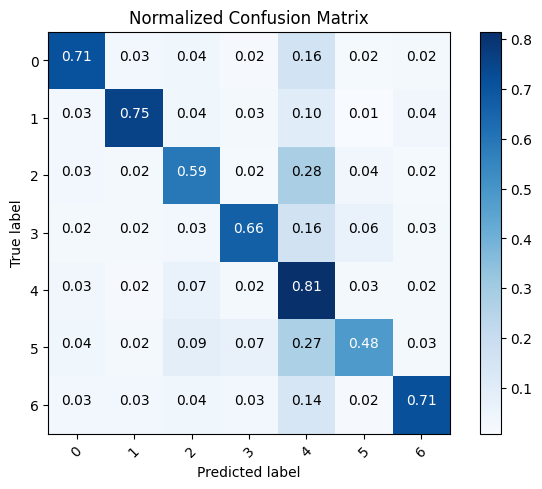

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 3 operations to synchronize with Neptune. Do not kill this process.
All 3 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/fed-comp/Deep-Learning-Project/e/DEEP-32/metadata


In [9]:
import neptune
import matplotlib.pyplot as plt
import numpy as np
import itertools
from pytorch_lightning.loggers import NeptuneLogger
from sklearn.metrics import confusion_matrix
from neptune.types import File

# Adicionar listas para armazenar valores de perda e acurácia - Para cada época.
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Adicionar listas para armazenar valores de perda e acurácia de cada batch - Pois está aprendendo muito rápido.
batch_train_losses = []
batch_val_losses = []
batch_train_accuracies = []
batch_val_accuracies = []

run = neptune.init_run(
    project="fed-comp/Deep-Learning-Project",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIwYmM1YWUzOC1lMjliLTQ0OGQtOWI5Zi1mMGRkYTI2YTNhYmEifQ==",
)
# Project key = DEEP

params_dict = {
    "num_classes": num_classes,
    "data_dir": data_dir,
    "train_size": train_size,
    "val_size": val_size,
    "batch_size": batch_size,
    "num_workers": num_workers,
    "device": str(device),
    "criterion": str(criterion),
    "optimizer": str(optimizer),
    "num_epochs": num_epochs,
}

run["parameters"] = params_dict

# Configurando o logger do PyTorch
logger = NeptuneLogger(run=run)

for epoch in range(num_epochs):
    true_labels = []
    predicted_labels = []

    print('Epoca: ' + str(epoch))
    
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()
        
        running_loss = 0.0
        running_corrects = 0

        # Obtenha o DataLoader e o conjunto de dados para a fase atual
        dataloader = dataloaders[phase]
        dataset = train_dataset if phase == 'train' else val_dataset

        # Adicionar um contador de batches
        batch_counter = 0

        # Iterar sobre o DataLoader usando índices
        for idx, (inputs, labels) in enumerate(dataloader):
            # Obter o caminho da imagem atual
            img_path, _ = dataset.dataset.samples[dataset.indices[idx]]
            
            # Imprimir o caminho da imagem
            # print(idx)
            # print(f"Processando a imagem: {img_path}")

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            # Calcular a perda e a acurácia do batch atual
            batch_loss = loss.item()
            batch_corrects = torch.sum(preds == labels.data).item()
            batch_acc = batch_corrects / inputs.size(0)

            # Imprimir a perda e a acurácia do batch atual
            # print(f"Batch {batch_counter}: Loss: {batch_loss:.4f}, Acc: {batch_acc:.4f}")

            # Essa parte é apenas para plotar o gráfico por batch, já que vou treinar por uma época apenas.
            if phase == 'train':
                batch_train_losses.append(batch_loss)
                batch_train_accuracies.append(batch_acc)
            
            # Adicionar rótulos e previsões às listas
            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(preds.cpu().numpy())

        epoch_loss = running_loss / len(dataset)
        epoch_acc = running_corrects.double() / len(dataset)

        print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

        if phase == 'train':
            run["train/loss"].append(epoch_loss)
            run["train/acc"].append(epoch_acc)
        else:
            run["val/loss"].append(epoch_loss)
            run["val/acc"].append(epoch_acc)

# Calcular e plotar a matriz de confusão na últim época
cm = confusion_matrix(true_labels, predicted_labels)
class_names = [str(i) for i in range(num_classes)]  # Altere isso de acordo com os nomes das classes do seu problema
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Normalized Confusion Matrix')

# Ajustar o espaço entre os subplots
# plt.subplots_adjust(bottom=-1, left=-1)  # Ajuste os valores conforme necessário

# Salvar a imagem gerada
fig_name = f"confusion_matrix.png"
plt.savefig(fig_name)
run["Confusion Matriz"].upload(fig_name)

plt.show()

run.stop()

In [10]:
# Salvar os pesos do modelo treinado
torch.save(model.state_dict(), 'trained_model_weights_squeezenet.pt')

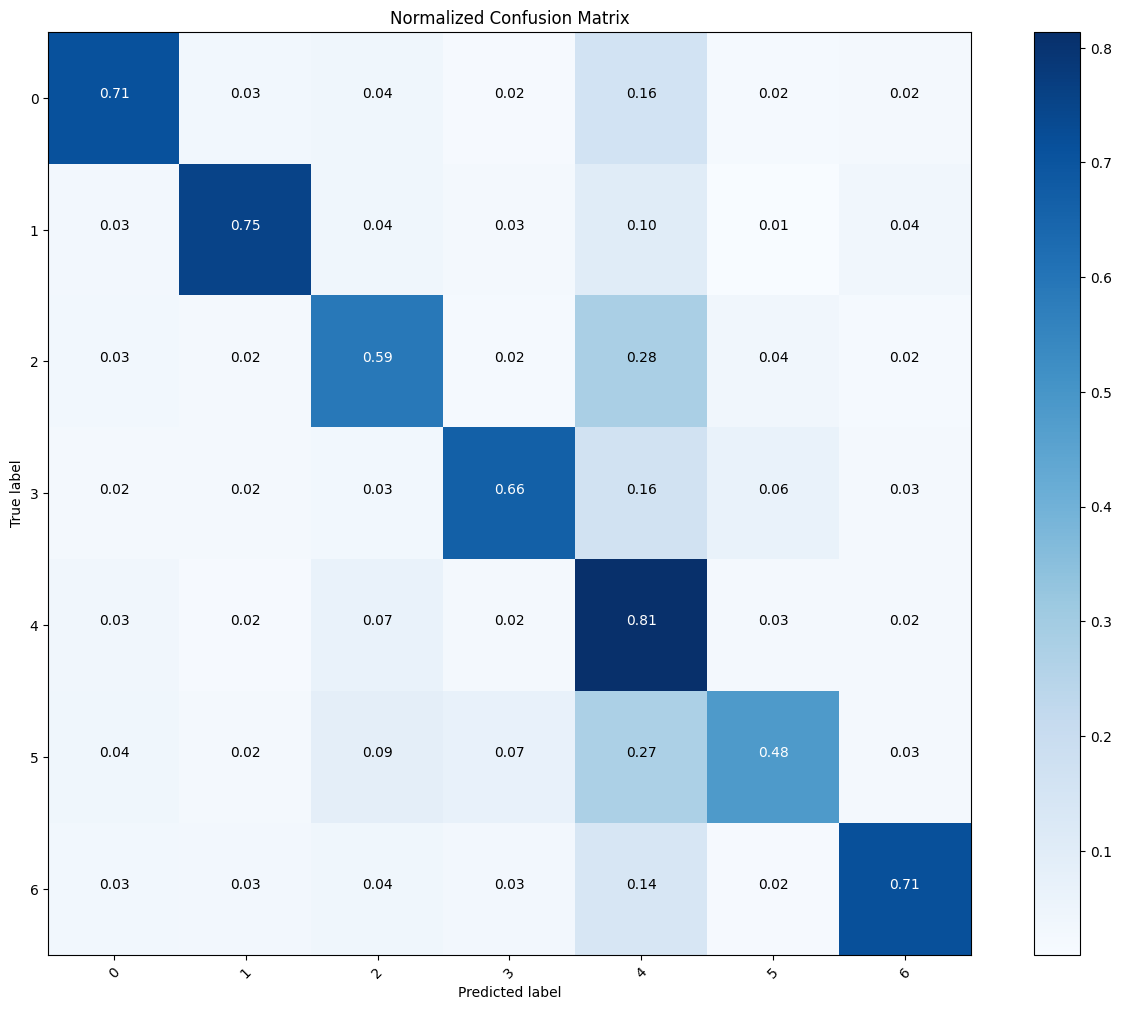

In [11]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Normalized Confusion Matrix')

# Ajustar o espaço entre os subplots
plt.subplots_adjust(bottom=-1, left=-1)  # Ajuste os valores conforme necessário

# Salvar a imagem gerada
fig_name = f"confusion_matrix_squeezenet.png"
plt.savefig(fig_name, bbox_inches='tight')

plt.show()